## Titanic Kaggle Challenge (My Second Submission)

This method was following two tutorial

1. [Sanjay](https://github.com/Msanjayds)
2. [Asha Gaire](https://medium.com/backprop-labs/kaggle-submission-for-titanic-dataset-fd7950a0d65)

Why there are two tutorial, because in Sanjay using fastai and there is a deprecated things

And Asha Gaire tell really clear with example using CatBoost, but there one failed model, that is Logstic Regression, but all is fine

This rebuild model make me up from about 69k into 6.9k in leaderboard position!!!

> July, 17$^{th}$ 2021

In [1]:
# Machine Learning
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

import catboost
from catboost import CatBoostClassifier, Pool, cv

# Data Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

# Data Manipulation
import pandas as pd
import numpy as np

# Basic Module
import datetime
import random
import time
import math

# Remove Warnings
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-whitegrid')

## Load Train and Test Data

In [2]:
gender_submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
print("Train shape:", df_train.shape)
print("Test_shape:", df_test.shape)

Train shape: (891, 12)
Test_shape: (418, 11)


In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis

In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:ylabel='Frequency'>

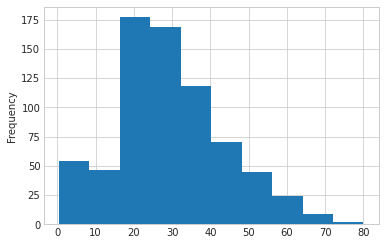

In [6]:
df_train.Age.plot.hist()

In [7]:
data = df_train

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
data['Died'] = 1 - data['Survived']

In [10]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Died
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


<AxesSubplot:xlabel='Sex'>

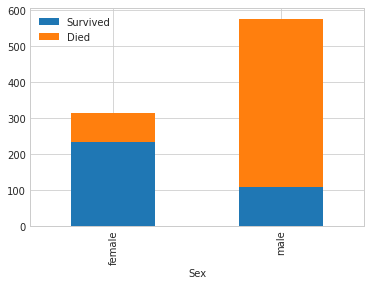

In [11]:
data.groupby("Sex").agg('sum')[['Survived', 'Died']].plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

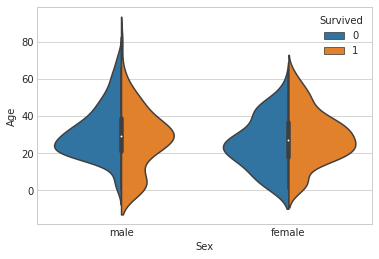

In [12]:
sns.violinplot(x='Sex', y='Age', hue='Survived', data=data, split=True)

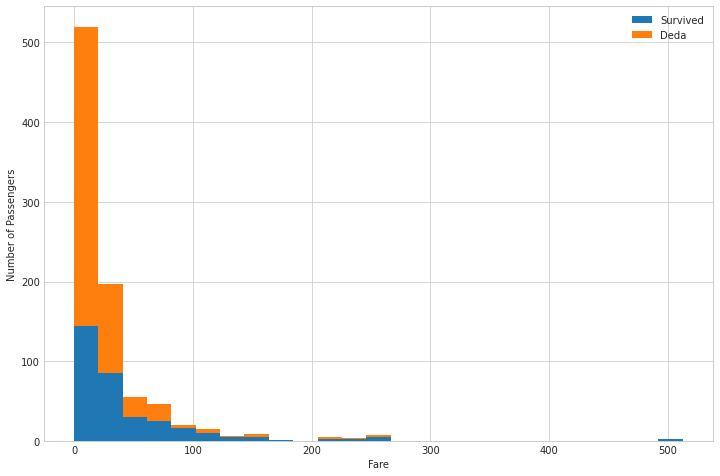

In [13]:
figure = plt.figure(figsize=(12,8))
plt.hist([data[data['Survived'] == 1]['Fare'], data[data['Survived'] == 0]['Fare']],
         stacked = True,
         bins = 25, 
         label = ['Survived', 'Deda'])

plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.legend()

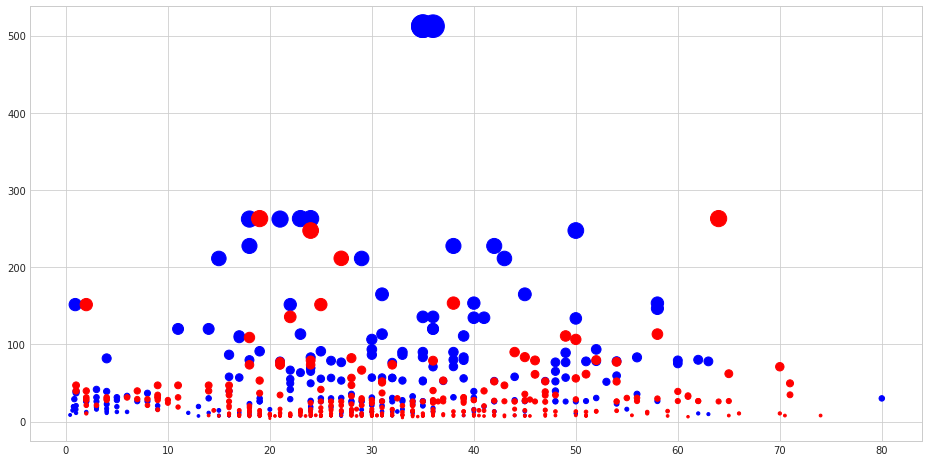

In [14]:
# Combining age, fare and survivor

plt.figure(figsize=(16, 8))
ax = plt.subplot()

ax.scatter(data[data['Survived'] == 1]['Age'], data[data['Survived'] == 1]['Fare'],
           c = 'blue', s = data[data['Survived'] == 1]['Fare'])
ax.scatter(data[data['Survived'] == 0]['Age'], data[data['Survived'] == 0]['Fare'],
           c = 'red', s = data[data['Survived'] == 0]['Fare'])

<AxesSubplot:xlabel='Pclass', ylabel='Average fare'>

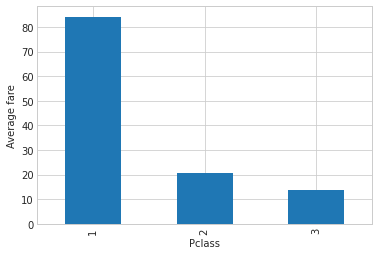

In [15]:
# Ticket fare versus class

ax = plt.subplot()
ax.set_ylabel('Average fare')
data.groupby('Pclass').mean()['Fare'].plot(kind='bar', ax=ax)

In [16]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Check Missing Values

<AxesSubplot:>

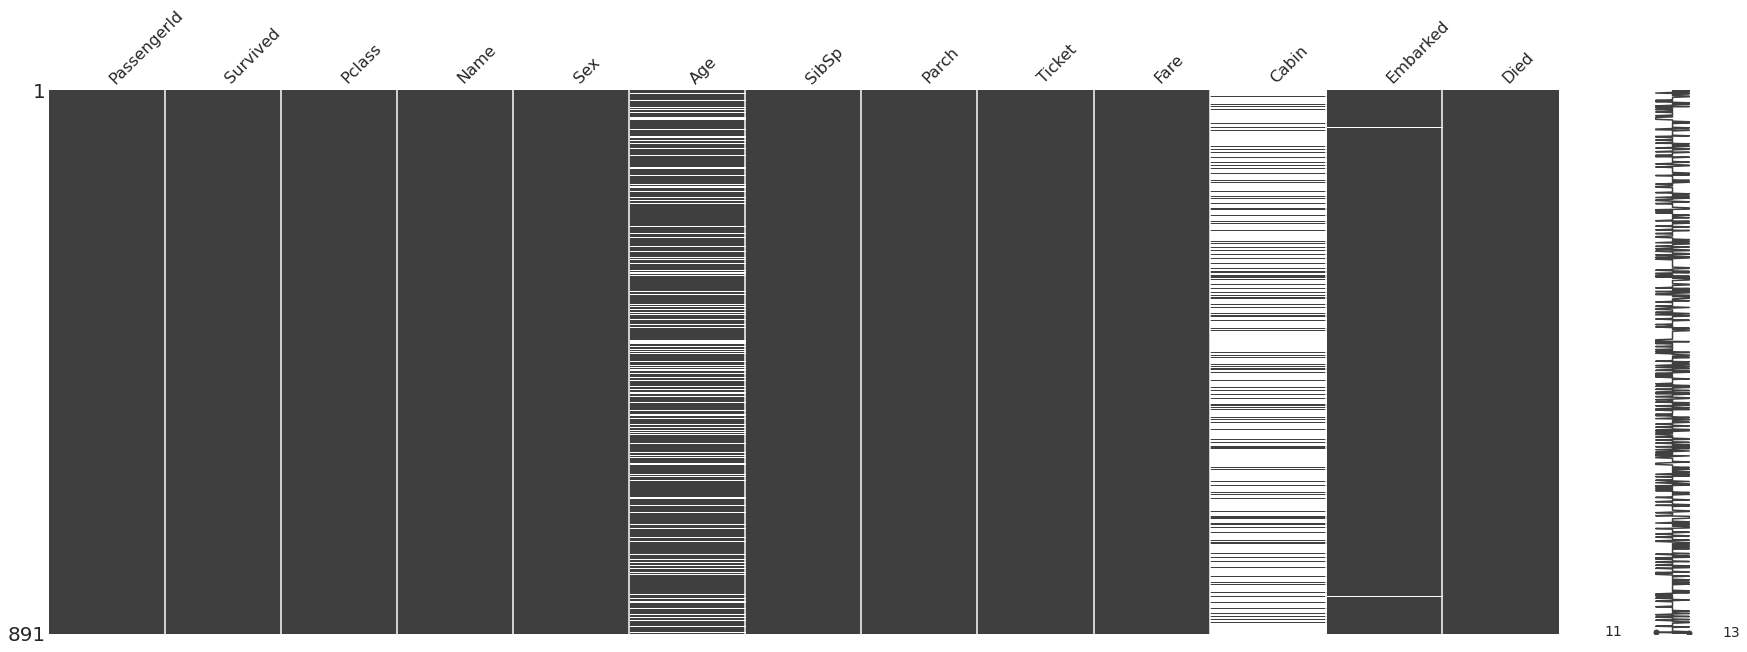

In [17]:
missingno.matrix(df_train, figsize=(30,10))

In [18]:
# alternative way
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Died             0
dtype: int64

In [19]:
df_new = pd.DataFrame()

In [20]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Died             int64
dtype: object

## Explore data individually

In [21]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Died
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


### Feature: Survived

0    549
1    342
Name: Survived, dtype: int64


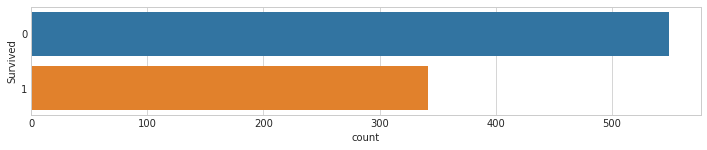

In [22]:
# How many survived?
fig = plt.figure(figsize=(12, 2))
sns.countplot(y='Survived', data=df_train)
print(df_train.Survived.value_counts())

In [23]:
df_new['Survived'] = df_train['Survived']
df_new.head()

,Survived
0,0
1,1
2,1
3,1
4,0


### Feature: Pclass

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

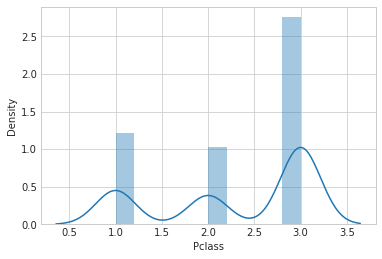

In [24]:
sns.distplot(df_train.Pclass)

In [25]:
df_train.Pclass.isnull().sum()

0

In [26]:
df_new['Pclass'] = df_train['Pclass']

### Feature: Name

In [27]:
df_train.Name.value_counts()

Appleton, Mrs. Edward Dale (Charlotte Lamson)    1
Burke, Mr. Jeremiah                              1
Leonard, Mr. Lionel                              1
Emanuel, Miss. Virginia Ethel                    1
Morley, Mr. William                              1
                                                ..
Balkic, Mr. Cerin                                1
Ford, Miss. Robina Maggie "Ruby"                 1
Oreskovic, Miss. Marija                          1
Zabour, Miss. Hileni                             1
Nysveen, Mr. Johan Hansen                        1
Name: Name, Length: 891, dtype: int64

Because the length of name is 891 (same like the row of data) - We can't uses this

### Feature: Sex

<AxesSubplot:xlabel='count', ylabel='Sex'>

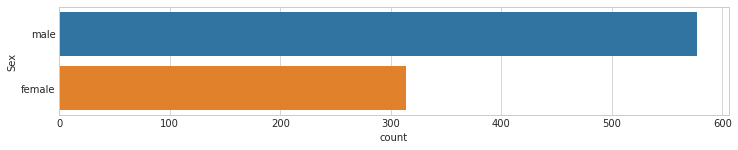

In [28]:
plt.figure(figsize=(12,2))
sns.countplot(y='Sex', data=df_train)

In [29]:
df_train.Sex.isnull().sum()

0

In [30]:
df_new['Sex'] = df_train['Sex']
df_new.head()

,Survived,Pclass,Sex
0,0,3,male
1,1,1,female
2,1,3,female
3,1,1,female
4,0,3,male


In [31]:
df_new['Sex'] = LabelEncoder().fit_transform(df_new['Sex'])
df_new.head()

,Survived,Pclass,Sex
0,0,3,1
1,1,1,0
2,1,3,0
3,1,1,0
4,0,3,1


<AxesSubplot:xlabel='Sex', ylabel='Density'>

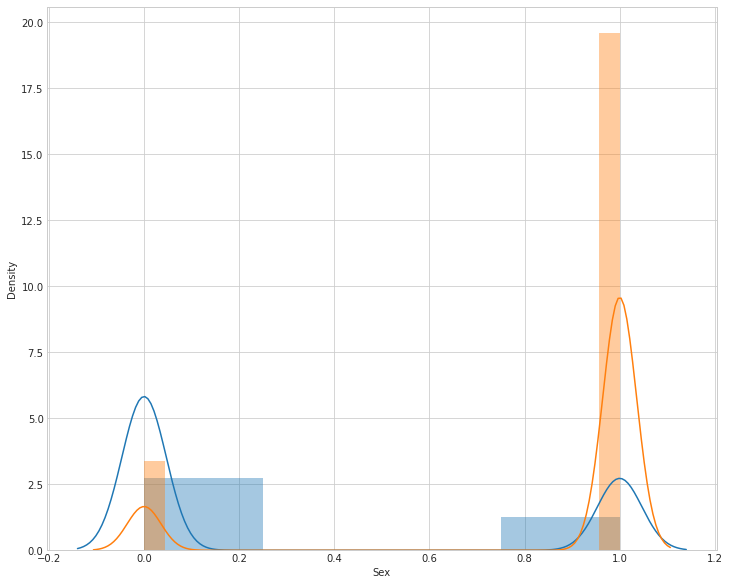

In [32]:
fig = plt.figure(figsize=(12,10))
sns.distplot(df_new.loc[df_new['Survived'] == 1]['Sex'], kde_kws={'bw_method': 0.1, "label":"Survived"})
sns.distplot(df_new.loc[df_new['Survived'] == 0]['Sex'], kde_kws={'bw_method': 0.1, "label":"Died"})

### Feature: Age

In [33]:
df_train.Age.isnull().sum()

177

There about 177 missing values, it better to skip it first

In [34]:
# Function to make easier distploting the graph
def plot_count_dist(data, label_column, target_column, figsize=(12, 4)):
    fig = plt.figure(figsize=figsize)
    plt.subplot(1, 2, 1)
    sns.countplot(y=target_column, data=data)
    plt.subplot(1, 2, 2)
    sns.distplot(data.loc[data[label_column] == 1][target_column],
                kde_kws={'bw_method':0.2, "label":"Survived"})
    sns.distplot(data.loc[data[label_column] == 0][target_column],
                kde_kws={'bw_method':0.2, "label":"Died"})

### Feature: SibSp

In [35]:
df_train.SibSp.isnull().sum()

0

In [36]:
df_train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

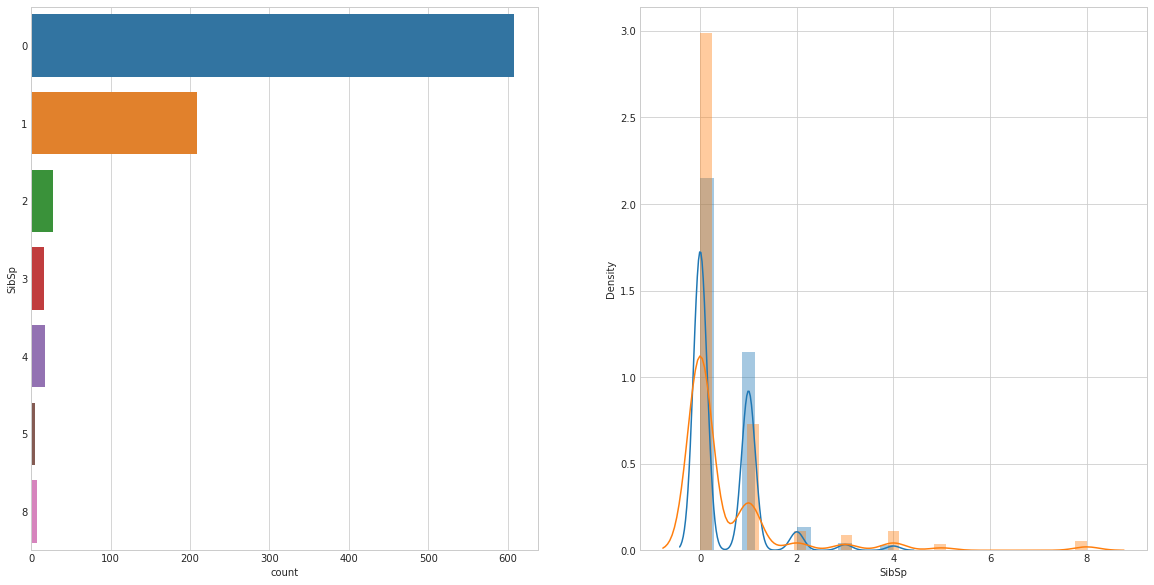

In [37]:
plot_count_dist(df_train, label_column='Survived', target_column='SibSp', figsize=(20,10))

In [38]:
df_new['SibSp'] = df_train['SibSp']

### Feature: Parch

In [39]:
df_train.Parch.isnull().sum()

0

In [40]:
df_train.Parch.value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

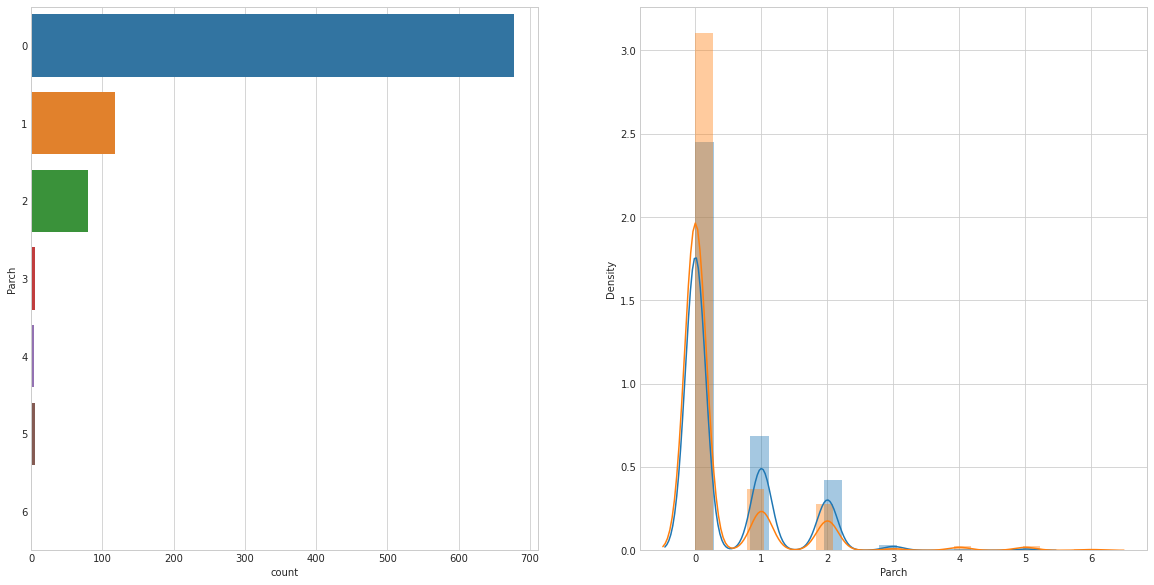

In [41]:
plot_count_dist(df_train, label_column='Survived', target_column='Parch', figsize=(20,10))

In [42]:
df_new['Parch'] = df_train['Parch']

### Feature: Ticket

In [43]:
df_train.Ticket.isnull().sum()

0

In [44]:
df_train.Ticket.value_counts()

1601          7
CA. 2343      7
347082        7
347088        6
3101295       6
             ..
A/4. 39886    1
28220         1
350043        1
7553          1
PC 17318      1
Name: Ticket, Length: 681, dtype: int64

There about 681 different values, so let's skip it

### Feature: Fare

In [45]:
df_train.Fare.isnull().sum()
df_train.Fare.dtype

dtype('float64')

In [46]:
df_train.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
50.4958     1
13.8583     1
8.4583      1
7.7250      1
7.5208      1
Name: Fare, Length: 248, dtype: int64

There are 248 different vlaues, but it's a numerical continious variable, so let include it into data frame

In [47]:
df_new['Fare'] = df_train['Fare']

### Feature: Cabin

In [48]:
df_train.Cabin.isnull().sum()

687

Thre is 687 null items, so let's skip this

### Feature: Embarked

In [49]:
df_train.Embarked.isnull().sum()

2

There are two missing values, let's see

In [50]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Embarked'>

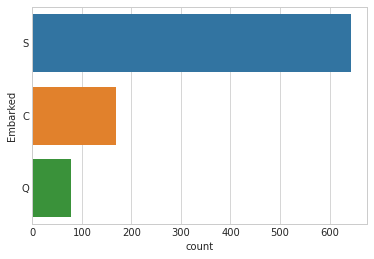

In [51]:
sns.countplot(y='Embarked', data=df_train)

Because only two, let's added into the dataframe and then remove it

In [52]:
df_new['Embarked'] = df_train['Embarked']

In [53]:
len(df_new)

891

In [54]:
df_new = df_new.dropna(subset=['Embarked'])

In [55]:
len(df_new)

889

## Feature Encoding
Applied technique to features convert into numerical form

In [56]:
df_new.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,1,1,0,7.2500,S
1,1,1,0,1,0,71.2833,C
2,1,3,0,0,0,7.9250,S
3,1,1,0,1,0,53.1000,S
4,0,3,1,0,0,8.0500,S


In [57]:
# One hot encode the categorical columns
df_embarked_one_hot = pd.get_dummies(df_new['Embarked'],
                                     prefix='embarked')

df_sex_one_hot = pd.get_dummies(df_new['Sex'],
                                prefix='sex')

df_pclass_one_hot = pd.get_dummies(df_new['Pclass'],
                                   prefix='pclass')

In [58]:
# Combine the one hot encoded columns with df_con_enc
df_new_enc = pd.concat([df_new,
                        df_embarked_one_hot,
                        df_sex_one_hot,
                        df_pclass_one_hot], axis = 1)

# Drop the original columns
df_new_enc = df_new_enc.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [59]:
df_new_enc

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_0,sex_1,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,13.0000,0,0,1,0,1,0,1,0
887,1,0,0,30.0000,0,0,1,1,0,1,0,0
888,0,1,2,23.4500,0,0,1,1,0,0,0,1
889,1,0,0,30.0000,1,0,0,0,1,1,0,0


## Building Machine Leanring Models

In [60]:
selected_df = df_new_enc
selected_df.head()

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_0,sex_1,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1


In [61]:
# Split the dataframe into data and labels
X_train = selected_df.drop('Survived', axis=1)
y_train = selected_df.Survived

In [62]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_model(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation
    train_predict = model_selection.cross_val_predict(algo, X_train,
                                                      y_train, cv=cv,
                                                      n_jobs=-1)
    
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_predict) * 100, 2)
    return train_predict, acc, acc_cv

### K-Nearest Neighbours

In [63]:
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_model(KNeighborsClassifier(),
                                                   X_train, y_train, 10)

knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 83.46
Accuracy CV 10-Fold: 76.72
Running Time: 0:00:02.149419


### Gaussian Naive Bayes

In [64]:
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_model(GaussianNB(),
                                                                  X_train, y_train, 10)

gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 78.52
Accuracy CV 10-Fold: 77.95
Running Time: 0:00:00.061816


### Linear Support Vector Machines (SVC)

In [65]:
start_time = time.time()
train_pred_svc, acc_svc, acc_cv_svc = fit_ml_model(LinearSVC(),
                                                   X_train, y_train, 10)

svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_svc)
print("Running Time: %s" % datetime.timedelta(seconds=svc_time))

Accuracy: 78.07
Accuracy CV 10-Fold: 76.72
Running Time: 0:00:00.282475


### Stochastic Gradient Descent

In [66]:
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_model(SGDClassifier(),
                                                   X_train, y_train, 10)

sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 65.92
Accuracy CV 10-Fold: 66.7
Running Time: 0:00:00.124204


### Decision Tree Classifier

In [67]:
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_model(tree.DecisionTreeClassifier(),
                                                X_train, y_train, 10)

dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 92.46
Accuracy CV 10-Fold: 80.09
Running Time: 0:00:00.071874


### Gradient Boost Trees

In [68]:
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_model(GradientBoostingClassifier(),
                                                   X_train, y_train, 10)

gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 86.61
Accuracy CV 10-Fold: 80.65
Running Time: 0:00:00.640291


### CatBoost

In [69]:
X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_0,sex_1,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [70]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [71]:
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10])

In [72]:
train_pool = Pool(X_train,
                  y_train,
                  cat_features)

In [73]:
# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool, plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.009797
0:	learn: 0.6862830	total: 55.3ms	remaining: 55.2s
1:	learn: 0.6809444	total: 56.9ms	remaining: 28.4s
2:	learn: 0.6751692	total: 58.9ms	remaining: 19.6s
3:	learn: 0.6689060	total: 60.7ms	remaining: 15.1s
4:	learn: 0.6632144	total: 62.5ms	remaining: 12.4s
5:	learn: 0.6576488	total: 64.2ms	remaining: 10.6s
6:	learn: 0.6544441	total: 65ms	remaining: 9.22s
7:	learn: 0.6490635	total: 66.9ms	remaining: 8.29s
8:	learn: 0.6443241	total: 70.5ms	remaining: 7.76s
9:	learn: 0.6395935	total: 73.6ms	remaining: 7.29s
10:	learn: 0.6345186	total: 75.2ms	remaining: 6.76s
11:	learn: 0.6305316	total: 76.8ms	remaining: 6.33s
12:	learn: 0.6275610	total: 77.8ms	remaining: 5.9s
13:	learn: 0.6225020	total: 79.6ms	remaining: 5.6s
14:	learn: 0.6179503	total: 81.3ms	remaining: 5.34s
15:	learn: 0.6140480	total: 82.2ms	remaining: 5.05s
16:	learn: 0.6100034	total: 83.5ms	remaining: 4.83s
17:	learn: 0.6049646	total: 86.2ms	remaining: 4.7s
18:	learn: 0.6025760	total: 87.5ms	remaining: 4.5

In [74]:
start_time = time.time()

# Set params for cross-validation
cv_params = catboost_model.get_params()

cv_data = cv(train_pool, cv_params,
             fold_count=10, plot=True)

catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_date)
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6746718	test: 0.6751020	best: 0.6751020 (0)
1:	learn: 0.6573540	test: 0.6583602	best: 0.6583602 (1)
2:	learn: 0.6408329	test: 0.6429257	best: 0.6429257 (2)
3:	learn: 0.6253924	test: 0.6283059	best: 0.6283059 (3)
4:	learn: 0.6114190	test: 0.6150989	best: 0.6150989 (4)
5:	learn: 0.6004513	test: 0.6048524	best: 0.6048524 (5)
6:	learn: 0.5900482	test: 0.5949158	best: 0.5949158 (6)
7:	learn: 0.5800356	test: 0.5853301	best: 0.5853301 (7)
8:	learn: 0.5702086	test: 0.5757925	best: 0.5757925 (8)
9:	learn: 0.5612227	test: 0.5675857	best: 0.5675857 (9)
10:	learn: 0.5522686	test: 0.5589941	best: 0.5589941 (10)
11:	learn: 0.5447302	test: 0.5517930	best: 0.5517930 (11)
12:	learn: 0.5377424	test: 0.5449873	best: 0.5449873 (12)
13:	learn: 0.5305336	test: 0.5382423	best: 0.5382423 (13)
14:	learn: 0.5241296	test: 0.5323280	best: 0.5323280 (14)
15:	learn: 0.5171284	test: 0.5265741	best: 0.5265741 (15)
16:	learn: 0.5113308	test: 0.5214578	best: 0.5214578 (16)
17:	learn: 0.5063945	test: 0.51688

In [75]:
# Print CatBoost model metrics
print("CatBoost Metrics")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validatin 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

CatBoost Metrics
Accuracy: 83.91
Accuracy cross-validatin 10-Fold: 81.32
Running Time: 0:00:31.042953


## Accuracy Score

In [76]:
models = pd.DataFrame({
    'Model' : ['KNN', 'Naive Bayes', 'Stochastic Gradient Decent',
               'Linear SVC', 'Decision Tree', 'Gradient Boosting Trees',
               'CatBoost'],
    'Score' : [
        acc_knn, acc_gaussian, acc_sgd,
        acc_svc, acc_dt, acc_gbt,
        acc_catboost
    ]
})

In [77]:
print("Regular Accuracy Scores")
models.sort_values(by='Score', ascending=False)

Regular Accuracy Scores


,Model,Score
4,Decision Tree,92.46
5,Gradient Boosting Trees,86.61
6,CatBoost,83.91
0,KNN,83.46
1,Naive Bayes,78.52
3,Linear SVC,78.07
2,Stochastic Gradient Decent,65.92


## Cross Validation Accuracy Score

In [78]:
cv_models = pd.DataFrame({
    'Model' : ['KNN', 'Naive Bayes', 'Stochastic Gradient Decent',
               'Linear SVC', 'Decision Tree', 'Gradient Boosting Trees',
               'CatBoost'],
    'Score' : [
        acc_cv_knn, acc_cv_gaussian, acc_cv_sgd,
        acc_cv_svc, acc_cv_dt, acc_cv_gbt,
        acc_cv_catboost
    ]
})

In [79]:
print("Cross Validation Accuracy Scores")
cv_models.sort_values(by='Score', ascending=False)

Cross Validation Accuracy Scores


,Model,Score
6,CatBoost,81.32
5,Gradient Boosting Trees,80.65
4,Decision Tree,80.09
1,Naive Bayes,77.95
0,KNN,76.72
3,Linear SVC,76.72
2,Stochastic Gradient Decent,66.70


## Submission

In [80]:
X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_0,sex_1,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [81]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [82]:
test_embarked_one_hot = pd.get_dummies(df_test['Embarked'],
                                       prefix='embarked')

test_sex_one_hot = pd.get_dummies(df_test['Sex'],
                                  prefix='sex')

test_pclass_one_hot = pd.get_dummies(df_test['Pclass'],
                                     prefix='pclass')

In [83]:
df_test = pd.concat([df_test,
                     test_embarked_one_hot,
                     test_sex_one_hot,
                     test_pclass_one_hot], axis=1)

In [84]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0,0,0,1


In [85]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'embarked_C', 'embarked_Q',
       'embarked_S', 'sex_female', 'sex_male', 'pclass_1', 'pclass_2',
       'pclass_3'],
      dtype='object')

In [86]:
X_train.columns

Index(['SibSp', 'Parch', 'Fare', 'embarked_C', 'embarked_Q', 'embarked_S',
       'sex_0', 'sex_1', 'pclass_1', 'pclass_2', 'pclass_3'],
      dtype='object')

In [87]:
df_test.rename(columns={"sex_female":"sex_0", "sex_male":"sex_1"}, inplace=True)

In [88]:
wanted_test_columns = X_train.columns

In [89]:
wanted_test_columns

Index(['SibSp', 'Parch', 'Fare', 'embarked_C', 'embarked_Q', 'embarked_S',
       'sex_0', 'sex_1', 'pclass_1', 'pclass_2', 'pclass_3'],
      dtype='object')

### Make Prediction using CatBoost

In [90]:
predictions = catboost_model.predict(df_test[wanted_test_columns])

In [91]:
predictions[:20]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1])

### Make Submission

In [92]:
submission = pd.DataFrame()
submission['PassengerId'] = df_test['PassengerId']
submission['Survived'] = predictions
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [93]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [94]:
if len(submission) == len(df_test):
    print("Submission dataframe is same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframe is mismatched, won't be able to be submitted")

Submission dataframe is same length as test (418 rows).


In [95]:
submission.to_csv("titanic_catboost_submission.csv", index=False)
print("Submission saved")

Submission saved
